In [2]:
import pandas as pd

df = pd.read_csv("dataset/dataset.csv")
df.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,Label
0,C,9,Y,0.54,Cat3,Class1
1,A,5,Y,0.20,Cat3,Class1
2,C,2,X,0.94,Cat3,Class1
3,C,4,Y,0.60,Cat1,Class1
4,A,7,X,0.69,Cat3,Class2
5,A,8,X,0.88,Cat2,Class2
6,C,3,Y,0.62,Cat1,Class1
7,B,1,Y,0.30,Cat2,Class2
8,C,4,X,0.11,Cat2,Class2
9,C,2,X,0.46,Cat2,Class2


In [3]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Label       0
dtype: int64

In [4]:
X,y=df.drop('Label', axis=1), df['Label']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Feature1', 'Feature3', 'Feature5']
continuous_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score 

model = DecisionTreeClassifier()
model.fit(X_train_encoded, Y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print('Classification Report:')
print(report)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Classification Report:
              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00         2
      Class2       0.71      0.62      0.67         8

    accuracy                           0.50        10
   macro avg       0.36      0.31      0.33        10
weighted avg       0.57      0.50      0.53        10

Accuracy: 0.5
Precision: 0.5714285714285714
Recall: 0.5
F1 Score: 0.5333333333333333


In [8]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

,Actual,Predicted
13,Class2,Class2
39,Class2,Class1
30,Class2,Class1
45,Class2,Class2
17,Class2,Class2
48,Class2,Class2
26,Class1,Class2
25,Class1,Class2
32,Class2,Class1
19,Class2,Class2


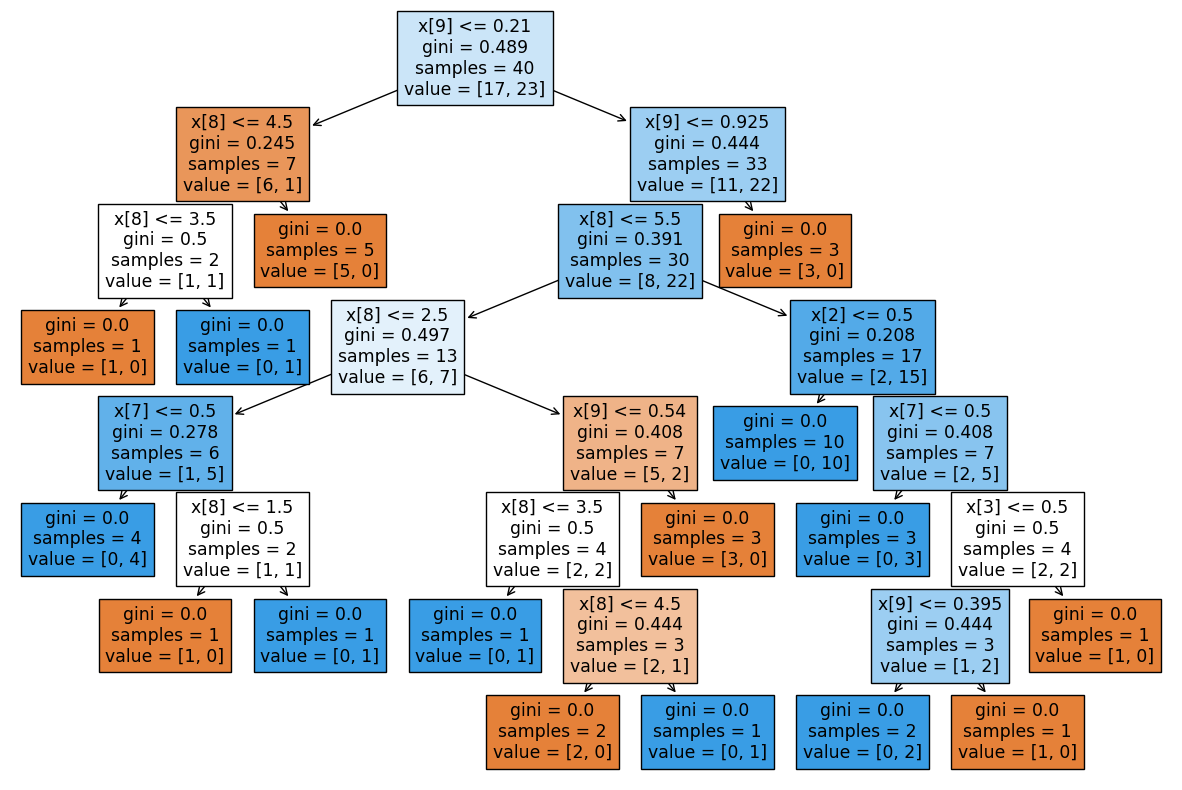

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot  as plt
plt.figure(figsize=(15,10))
plot_tree(model, filled=True)
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))


[[0 2]
 [3 5]]


Text(50.722222222222214, 0.5, 'Actual')

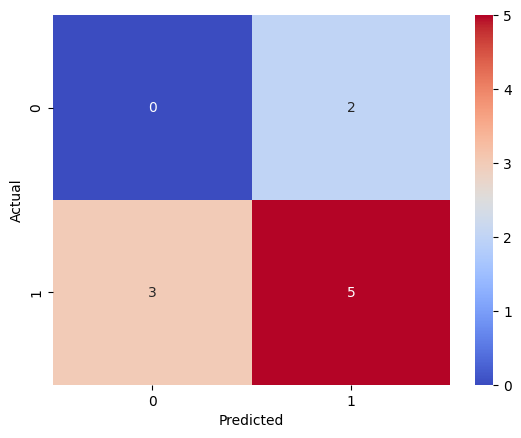

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='coolwarm' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
import numpy as np
print(np.unique(Y_train)) 
print(np.unique(Y_test)) 

['Class1' 'Class2']
['Class1' 'Class2']


In [13]:
# Function to calculate entropy
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy_value = - np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Function to calculate information gain for a feature
def information_gain(X, y, feature):
    total_entropy = entropy(y)
    values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / len(y)) * entropy(y[X[feature] == values[i]]) for i in range(len(values))])
    information_gain_value = total_entropy - weighted_entropy
    return information_gain_value

# Calculate entropy and information gain for each feature
for feature in X.columns:
    print(f'Entropy of {feature}:', entropy(y))
    print(f'Information Gain of {feature}:', information_gain(X, y, feature))
    print('---')


Entropy of Feature1: 0.9580420222262995
Information Gain of Feature1: 0.045316322570476575
---
Entropy of Feature2: 0.9580420222262995
Information Gain of Feature2: 0.16468878293469413
---
Entropy of Feature3: 0.9580420222262995
Information Gain of Feature3: 0.003149004833230107
---
Entropy of Feature4: 0.9580420222262995
Information Gain of Feature4: 0.8629442721830302
---
Entropy of Feature5: 0.9580420222262995
Information Gain of Feature5: 0.0057799322087206395
---
